## Load IMDB Data set
Only keep the top 10,000 most frequently occurring words in the data

In [1]:
from keras.datasets import imdb
# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
/Users/alvinjin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Get the distribution of review lengths

max, min, mean: (2494, 11, 238.71364)


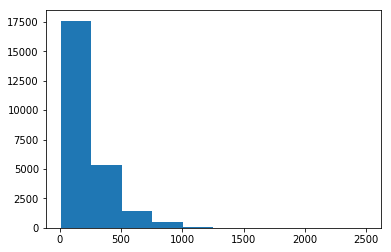

In [2]:
import numpy as np
import matplotlib.pyplot as plt

lens = list(map(len, x_train))
print('max, min, mean: {}'.format((np.max(lens), np.min(lens), np.mean(lens))))
plt.hist(lens)
plt.show()

## Pad or truncate each review to make the same length

In [4]:
from keras.preprocessing.sequence import pad_sequences

max_review_len = 500
x_train = pad_sequences(x_train, maxlen=max_review_len)
x_test = pad_sequences(x_test, maxlen=max_review_len)

x_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout

## Vectorization: Word Embeddings

In [6]:
model = Sequential()
model.add(Embedding(10000, 20, input_length=max_review_len))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.7)),
model.add(Dense(1, activation='sigmoid'))

In [7]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [8]:
x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

## Train and Test the model

In [9]:
history = model.fit(x_train, y_train,
                    epochs=2,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 11s 749us/step - loss: 0.5558 - acc: 0.6875 - val_loss: 0.3290 - val_acc: 0.8589
Epoch 2/2
15000/15000 [==============================] - 8s 560us/step - loss: 0.2595 - acc: 0.9004 - val_loss: 0.2871 - val_acc: 0.8825


In [10]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 171us/step


[0.29243849079132078, 0.87731999999999999]